In [111]:

# Import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add all other libraries you would require
from IPython.display import display, HTML
from plotnine import ggplot, aes, geom_bar, geom_boxplot, theme, element_text, labs, geom_line, geom_point
from plotnine import geom_hline, geom_vline, xlab, ylab, ggtitle, annotate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from IPython.display import display
from sklearn.metrics import confusion_matrix





<h1 style="font-size: 25px;">Data Preprocessing & Analysis</h1>


In [3]:

# Load the dataset
df = pd.read_csv(r'C:\Users\Soham Karmakar\My Python Stuffs\Machine Learning\Final Project\IMDBScore.csv')


In [4]:

# Display the first few rows of the dataset
print("\n\n\033[1m\033[4mFirst 10 Rows of the Dataset:\033[0m\n")
display(HTML(df.head(10).to_html()))




First 10 Rows of the Dataset:



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower|tower,http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|captain america|marvel cinematic universe|superhero,http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_tt_tt_1,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [5]:

# Display the shape of the dataset
df.shape


(5043, 28)

In [6]:

# Display the data types of the attributes
df.dtypes


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [7]:

# Display basic statistics of the numerical columns
print("\n\033[1m\033[4mBasic Statistics Of The Numerical Columns:")
basic_stats = df.describe().T
display(HTML(basic_stats.to_html()))



Basic Statistics Of The Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [8]:

# Distribution of the "color" column
df["color"].value_counts()


color
Color               4815
 Black and White     209
Name: count, dtype: int64

In [9]:

# Drop the unwanted columns (IMDB Link & Colour)
df.drop('movie_imdb_link', axis=1, inplace=True)
df.drop('color',axis=1,inplace=True)


In [10]:

# List of the columns
df.columns


Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [11]:

# Check for missing values
df.isna().any()


director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [12]:

# Number of missing values in each column
df.isna().sum()


director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [13]:

# Remove the missing values (NaNs) in specific columns where the count is less
df.dropna(axis=0, 
          subset=['director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 
                  'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'actor_1_name', 
                  'actor_3_name', 'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country', 
                  'actor_2_facebook_likes', 'plot_keywords'], 
          inplace=True)


In [14]:

df.shape


(4735, 26)

In [15]:

# Distribution of the "content_rating" column
df["content_rating"].value_counts()


content_rating
R            2081
PG-13        1435
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: count, dtype: int64

In [16]:

# Replace the missing values (NaNs) in the content_rating column with the value "R" as it has highest frequency
df["content_rating"] = df["content_rating"].fillna("R")


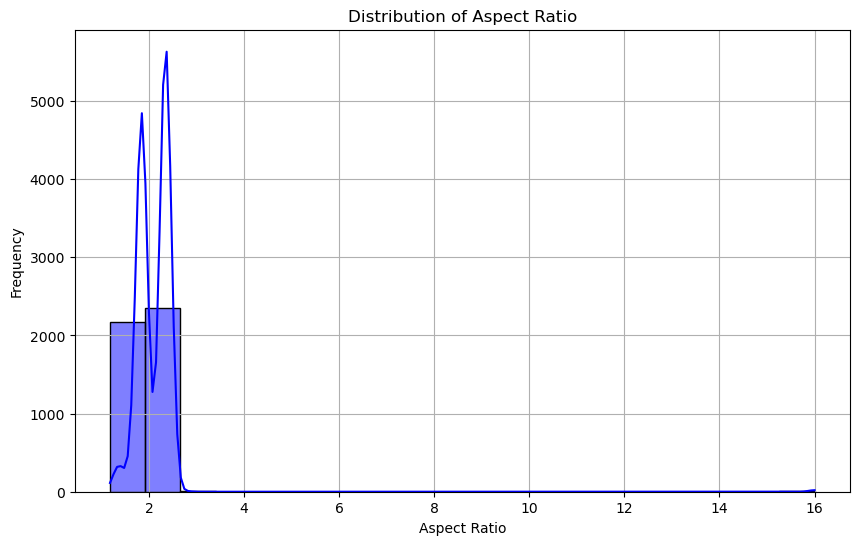

In [17]:

# Plotting the distribution of Aspect Ratio using seaborn's histplot (combined histogram & KDE)
plt.figure(figsize=(10, 6))
sns.histplot(df["aspect_ratio"].dropna(), bins=20, kde=True, color='blue')
plt.title("Distribution of Aspect Ratio")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [18]:

#Replace the missing values (NaNs) in the aspect_ratio column with the median as the graph is right skewed 
df["aspect_ratio"] = df["aspect_ratio"].fillna(df["aspect_ratio"].median())


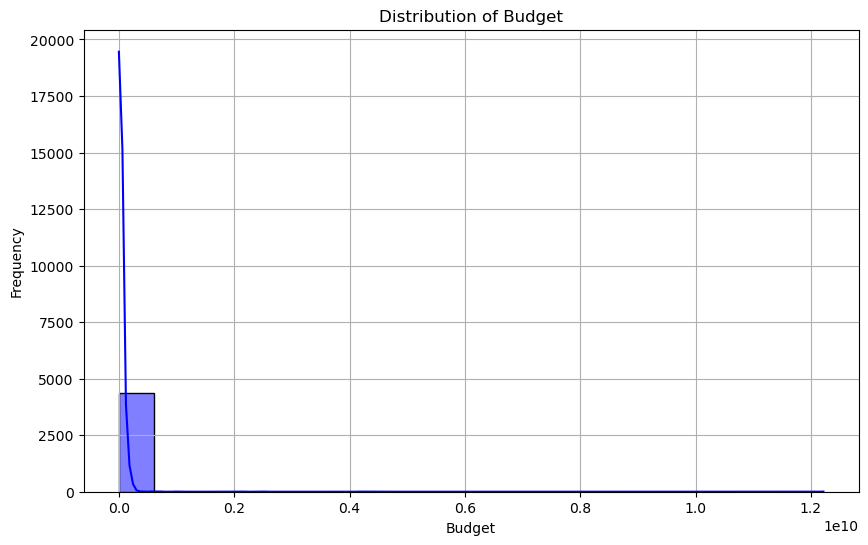

In [19]:

# Plotting the distribution of Budget using seaborn's histplot (combined histogram & KDE)
plt.figure(figsize=(10, 6))
sns.histplot(df["budget"].dropna(), bins=20, kde=True, color='blue')
plt.title("Distribution of Budget")
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [20]:

#Replace the missing values (NaNs) in the budget column with the median 
df["budget"] = df["budget"].fillna(df["budget"].median())


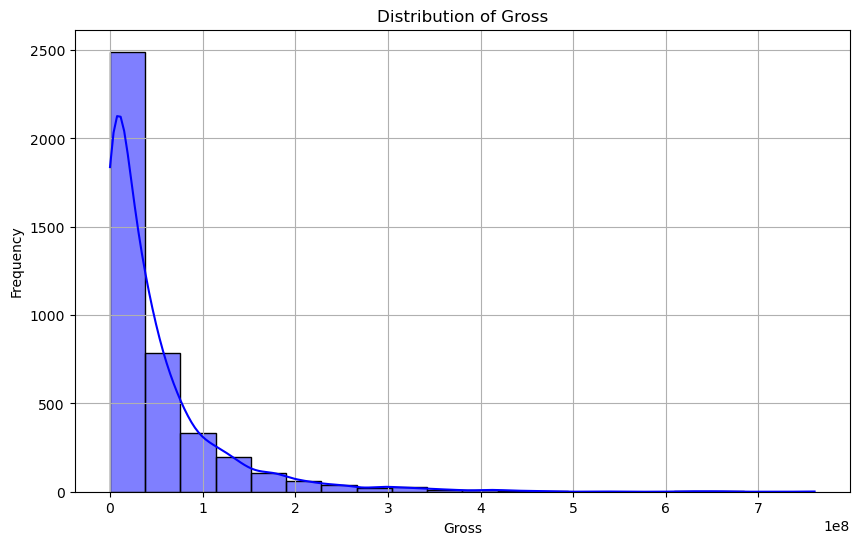

In [21]:

# Plotting the distribution of Gross using seaborn's histplot (combined histogram & KDE)
plt.figure(figsize=(10, 6))
sns.histplot(df["gross"].dropna(), bins=20, kde=True, color='blue')
plt.title("Distribution of Gross")
plt.xlabel("Gross")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [22]:

# Replace the missing values (NaNs) in the gross column with the median 
df["gross"] = df["gross"].fillna(df["gross"].median())


In [23]:

# Check whether the missing values are removed or not
df.isna().sum()


director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [24]:

# Remove the duplicate values in the dataset
df.drop_duplicates(inplace=True)
df.shape


(4693, 26)

In [25]:

# Distribution of the "language" column
df["language"].value_counts()


language
English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Italian         10
Cantonese       10
Korean           8
Portuguese       8
Danish           5
Persian          4
Norwegian        4
Dutch            4
Swedish          4
Hebrew           4
Thai             3
Arabic           3
Dari             2
Indonesian       2
Zulu             2
Aboriginal       2
Vietnamese       1
Polish           1
Romanian         1
Czech            1
Dzongkha         1
Mongolian        1
Icelandic        1
Hungarian        1
Bosnian          1
Aramaic          1
Telugu           1
Kazakh           1
Maya             1
Filipino         1
Greek            1
Name: count, dtype: int64

In [26]:

# Most of the values in the column 'language' is 'english', so we can drop the 'language'
df.drop('language',axis=1,inplace=True)


In [27]:

# Check that 'language' column is dropped
df.columns


Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [28]:

#Create a new column to check the net profit made by the company (Gross - Budget) 
df["Profit"]=df['gross'].sub(df['budget'], axis = 0) 
df.head(5)


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


In [29]:

#Create a new column to check the profit percentage made by the company 
df['Profit_Percentage']=(df["Profit"]/df["budget"])*100
df


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,...,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74,63071.0,901.014286
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,29056.000000
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413,-4416.0,-49.066667
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,26027495.0,Comedy|Drama,Eric Mabius,...,Canada,R,20000000.0,2013.0,470.0,7.7,2.35,84,6027495.0,30.137475


In [30]:

# Distribution of the "country" column
value_counts = df["country"].value_counts()
print(value_counts)


country
USA               3567
UK                 420
France             149
Canada             106
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Mexico              11
Denmark             11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Iran                 4
Argentina            4
Israel               3
West Germany         3
Switzerland          3
Belgium              3
Czech Republic       3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Hungary              2
Greece               2
Official site        1
Cambodia             1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
Colombia             1
New

**Let us divide the countries into three groups, namely USA, UK and Other.**

In [32]:

# Print the values in the column 'country' having top 2 indices
vals = value_counts[:2].index
print (vals)
df['country'] = df.country.where(df.country.isin(vals), 'other')


Index(['USA', 'UK'], dtype='object', name='country')


In [33]:

# Check whether the values are divided into 3 groups or not
df["country"].value_counts()


country
USA      3567
other     706
UK        420
Name: count, dtype: int64

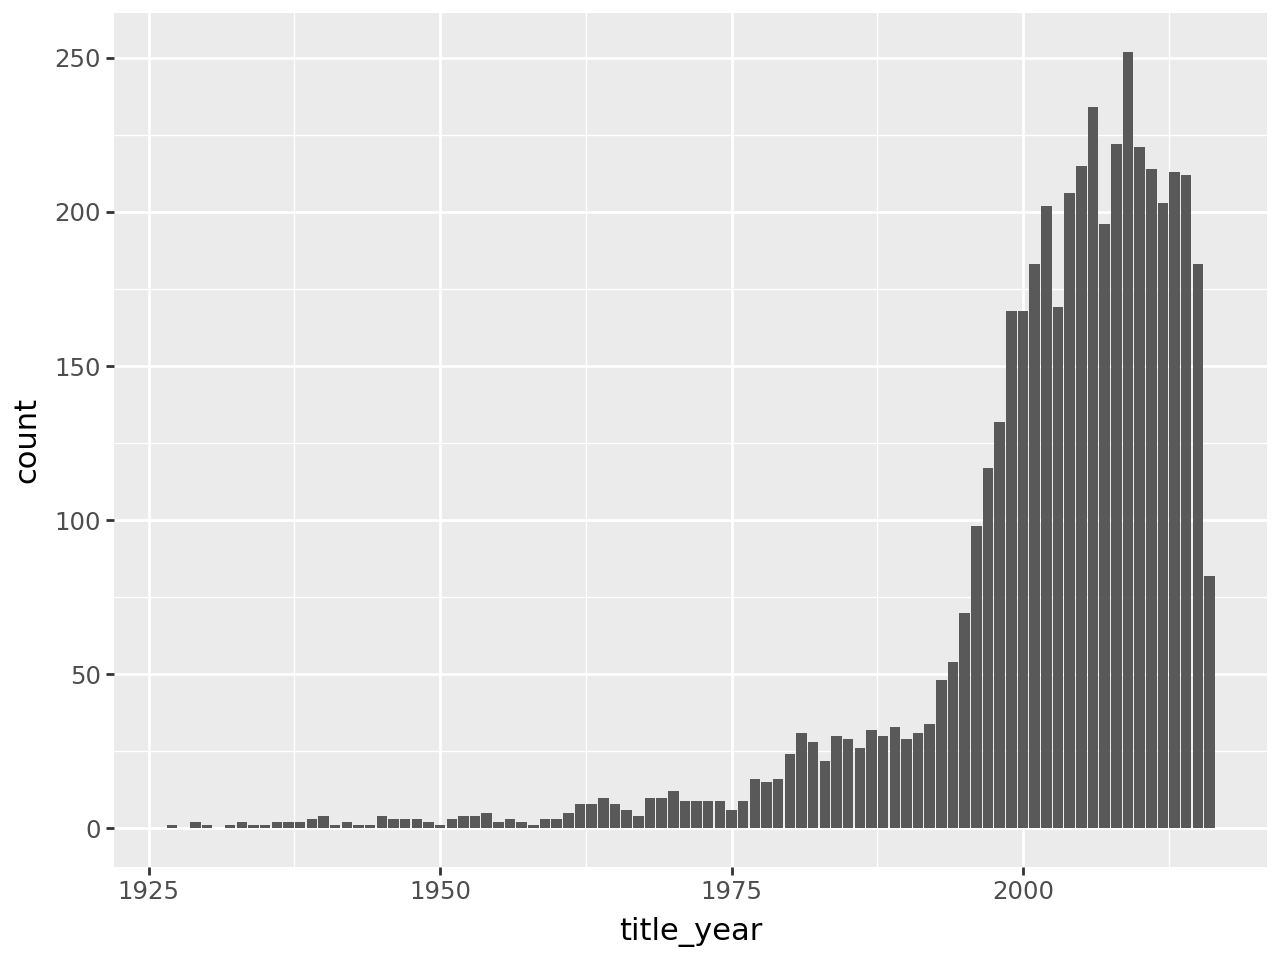

In [34]:

# Bar plot of the number of movies released year-wise 

(ggplot(df)               # defining what data to use
 + aes(x='title_year')    # defining what variable to use
 + geom_bar(size=20)      # defining the type of plot to use
)


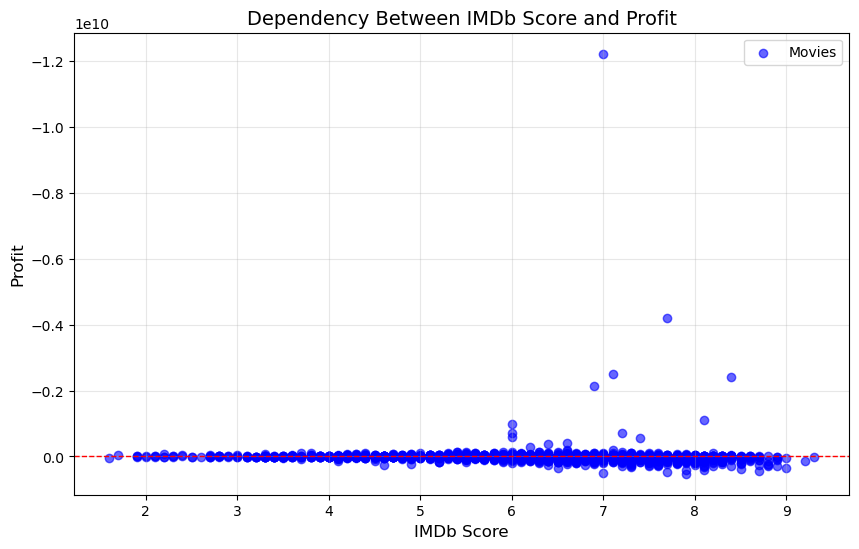

In [35]:

# Relationship between the IMDb score and the Profit
plt.figure(figsize=(10, 6))
plt.scatter(df['imdb_score'], df['Profit'], alpha=0.6, c='blue', label='Movies')
plt.title("Dependency Between IMDb Score and Profit", fontsize=14)
plt.xlabel("IMDb Score", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Highlight y=0 (break-even)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


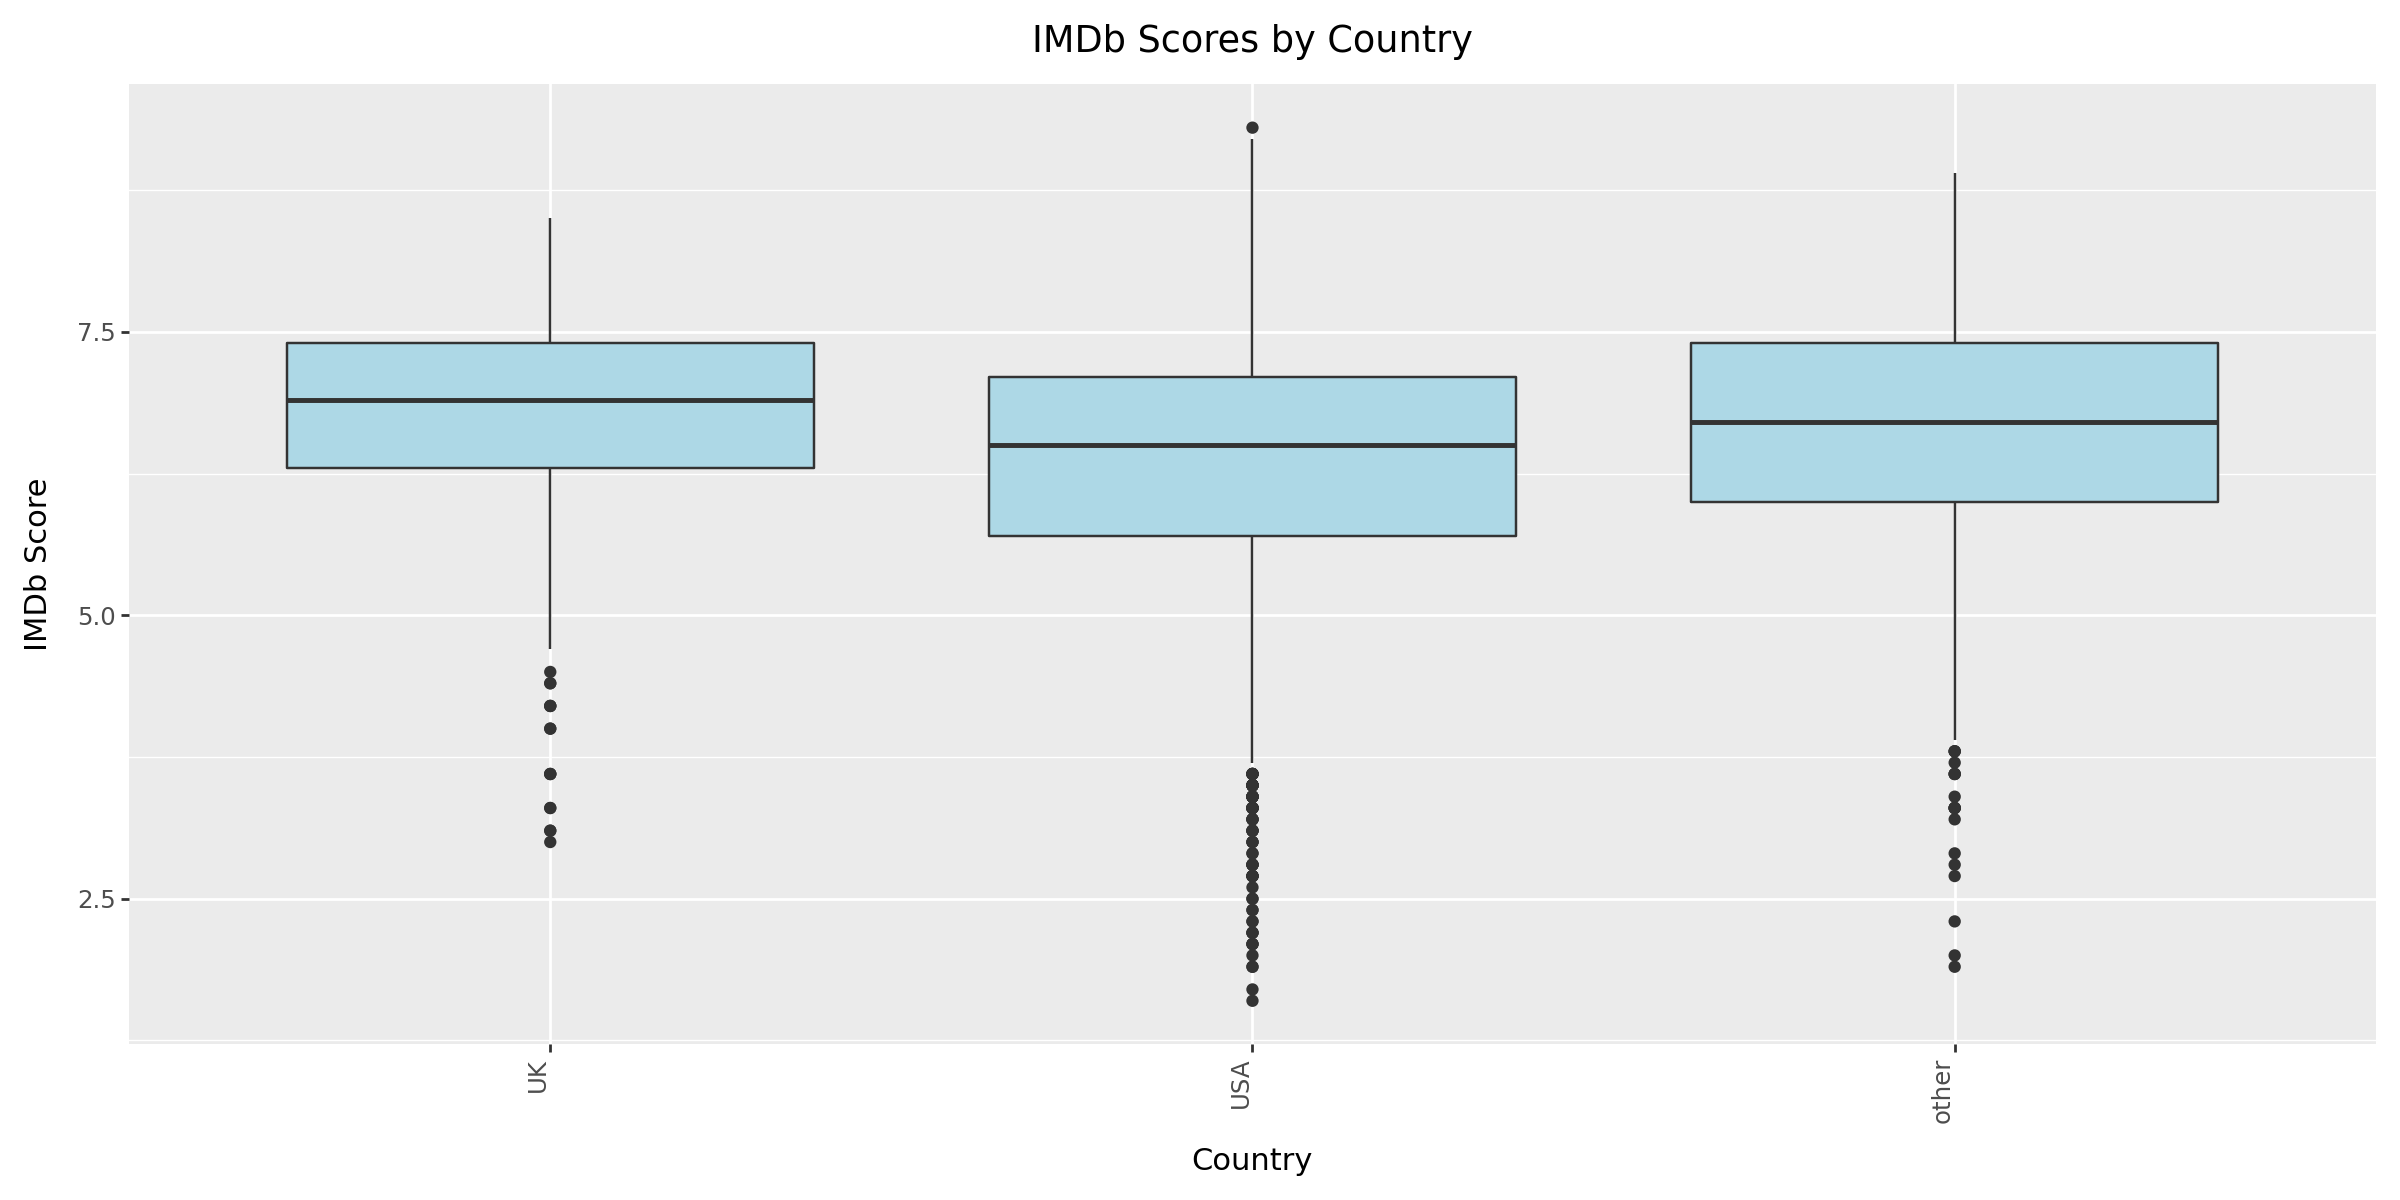

In [36]:

# IMDb ratings of movies across different countries
(
    ggplot(df, aes(x='country', y='imdb_score')) +
    geom_boxplot(fill="lightblue") +
    theme(axis_text_x=element_text(rotation=90, hjust=1),  # Rotate x-axis labels
          figure_size=(12, 6)) +  # Adjust figure size
    labs(title="IMDb Scores by Country", x="Country", y="IMDb Score")
)


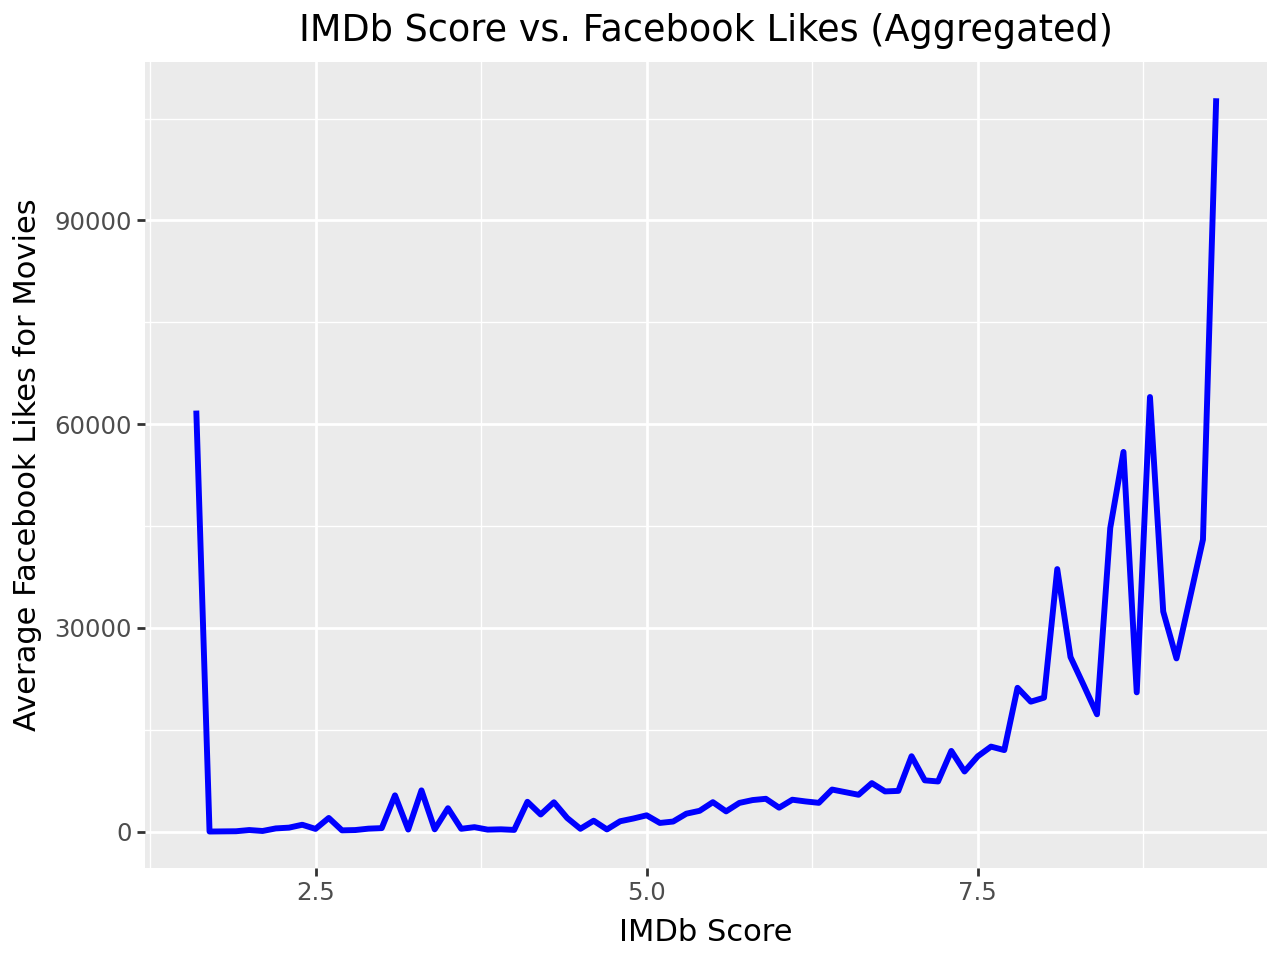

In [37]:

# Line plot for aggregated IMDb scores vs. Facebook likes
aggregated_data = df.groupby('imdb_score')['movie_facebook_likes'].mean().reset_index()

(
    ggplot(aggregated_data) +
    aes(x='imdb_score', y='movie_facebook_likes') +
    geom_line(color='blue', size=1.2) +
    labs(title='IMDb Score vs. Facebook Likes (Aggregated)', 
         x='IMDb Score', 
         y='Average Facebook Likes for Movies')
)


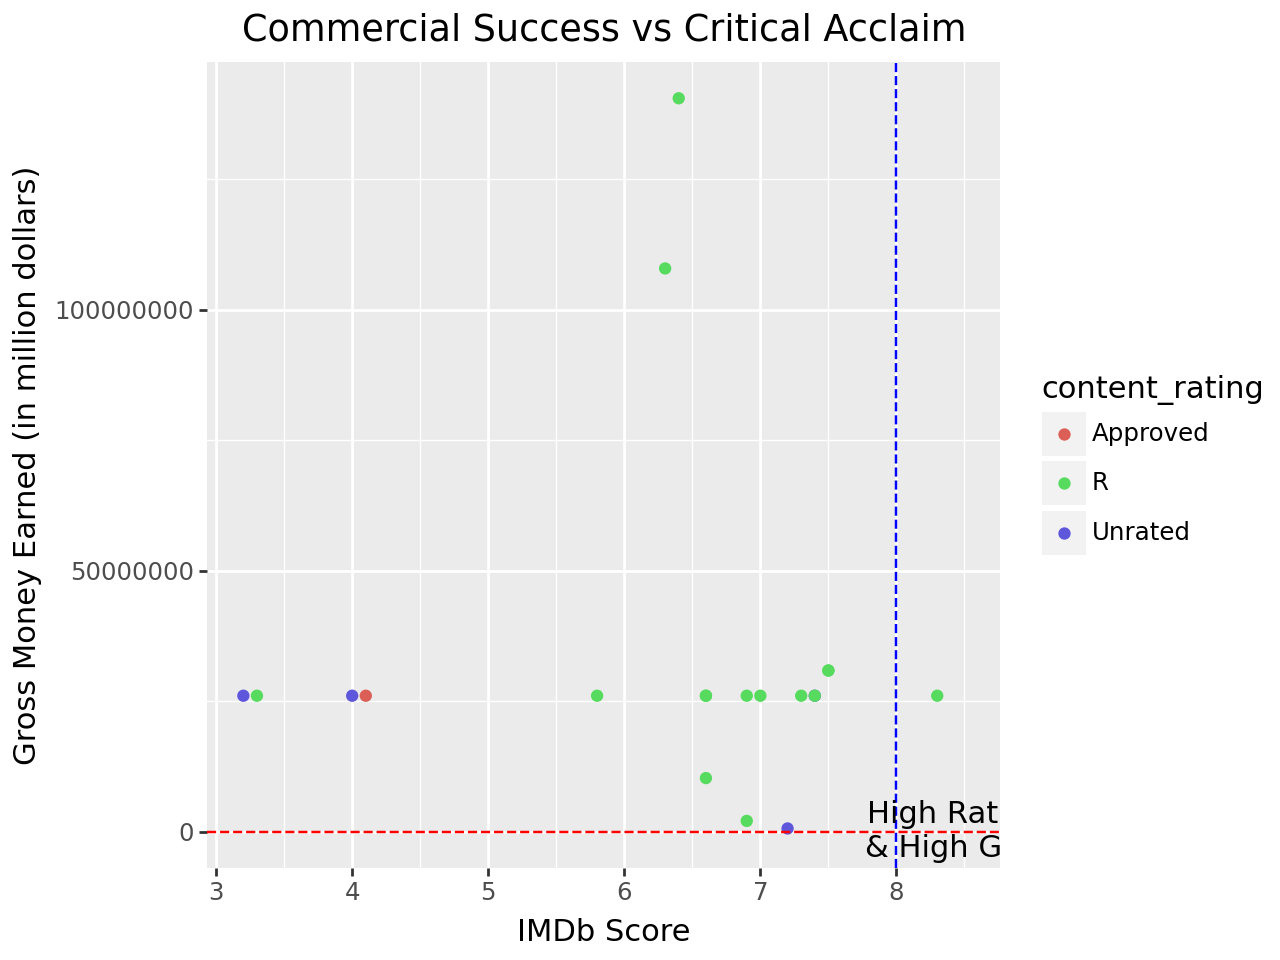

In [38]:

# Compare commercial success and critical acclaim
# Sort the dataframe by 'Profit_Percentage' and select top 20
df = df.sort_values(by='Profit_Percentage', ascending=False)
df_new = df.head(20)

# Create the plot
(
    ggplot(df_new) +
    aes(x='imdb_score', y='gross', color='content_rating') +
    geom_point() +
    geom_hline(yintercept=600, color='red', linetype='dashed') +  # Red dashed line for gross
    geom_vline(xintercept=8, color='blue', linetype='dashed') +  # Blue dashed line for IMDb score
    xlab("IMDb Score") +
    ylab("Gross Money Earned (in million dollars)") +
    ggtitle("Commercial Success vs Critical Acclaim") +
    annotate("text", x=8.5, y=700, label="High Ratings\n& High Gross", color="black")
)


**Data Preparation for the models**

In [40]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Profit', 'Profit_Percentage'],
      dtype='object')

In [41]:

# Remove the columns with names
df.drop('director_name', axis=1, inplace=True)
df.drop('actor_1_name',axis=1,inplace=True)
df.drop('actor_2_name',axis=1,inplace=True)
df.drop('actor_3_name',axis=1,inplace=True)
df.drop('movie_title',axis=1,inplace=True)
df.drop('plot_keywords',axis=1,inplace=True)


In [42]:
df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'genres',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Profit', 'Profit_Percentage'],
      dtype='object')

In [43]:

# Distribution of the "genres" column
value_counts = df["genres"].value_counts()
print(value_counts)


genres
Drama                                                      209
Comedy                                                     186
Comedy|Drama|Romance                                       182
Comedy|Drama                                               180
Comedy|Romance                                             149
                                                          ... 
Biography|Comedy|Drama|War                                   1
Adventure|Animation|Drama|Family|Musical                     1
Animation|Comedy                                             1
Action|Animation|Fantasy|Horror|Mystery|Sci-Fi|Thriller      1
Action|Comedy|Crime|Drama|Romance|Thriller                   1
Name: count, Length: 875, dtype: int64


In [44]:

# Since most of the values in the 'genres' column is equally distributed, so we drop the 'genres' column 
df.drop('genres',axis=1,inplace =True)


In [45]:
df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Profit', 'Profit_Percentage'],
      dtype='object')

In [46]:

# Remove the linearly dependent variables
df.drop('Profit',axis=1,inplace=True)
df.drop('Profit_Percentage',axis=1,inplace=True)


In [47]:
df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'country', 'content_rating', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

**Remove the correlated variables**

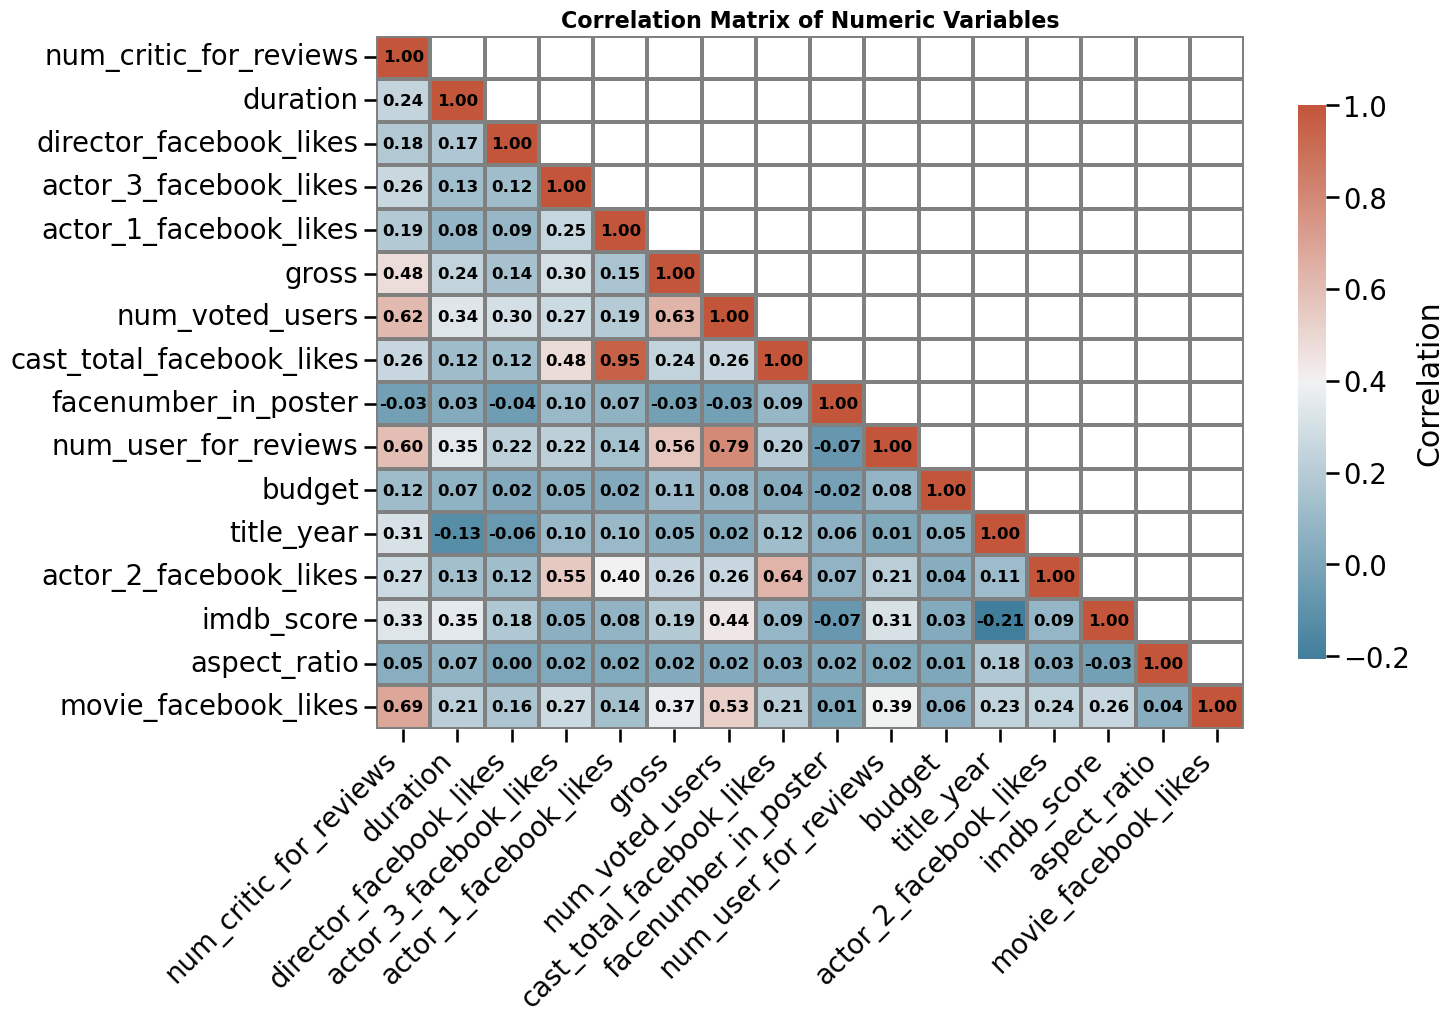

In [49]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Set up the figure size and context
sns.set_context("talk", font_scale=1.2)  # Adjust context and font size
plt.figure(figsize=(14, 9))  # Adjust figure size

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# Set a custom color palette
custom_palette = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap with customizations
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap=custom_palette,
                annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},  # Annotation style
                cbar_kws={'shrink': 0.8, 'label': 'Correlation'},  # Color bar settings
                linewidths=1.5, linecolor='gray')  # Add lines between cells

# Rotate the x and y-axis labels for better readability
a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
a.set_yticklabels(a.get_yticklabels(), rotation=0)

# Add a title
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, weight='bold')

# Show the plot
plt.show()



**Observation:**
The variables cast_total_facebook_likes, actor_1_facebook_likes, actor_2_facebook_likes, and actor_3_facebook_likes exhibit strong 
correlations with each other. To simplify, we plan to consolidate these into two variables: actor_1_facebook_likes and 
other_actors_facebook_likes, where the latter will encompass the combined likes for actor 2 and actor 3.

Additionally, there are notable correlations between num_voted_users, num_user_for_reviews, and num_critic_for_reviews. We will retain num_voted_users and create a new variable that represents the ratio of num_user_for_reviews to num_critic_for_reviews.


In [51]:

df['Other_actor_facebbok_likes'] = df["actor_2_facebook_likes"] + df['actor_3_facebook_likes']

df.drop('actor_2_facebook_likes',axis=1,inplace=True)
df.drop('actor_3_facebook_likes',axis=1,inplace=True)
df.drop('cast_total_facebook_likes',axis=1,inplace=True)

df['critic_review_ratio']=df['num_critic_for_reviews']/df['num_user_for_reviews']

df.drop('num_critic_for_reviews',axis=1,inplace=True)
df.drop('num_user_for_reviews',axis=1,inplace=True)


In [52]:
df.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'country',
       'content_rating', 'budget', 'title_year', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Other_actor_facebbok_likes',
       'critic_review_ratio'],
      dtype='object')

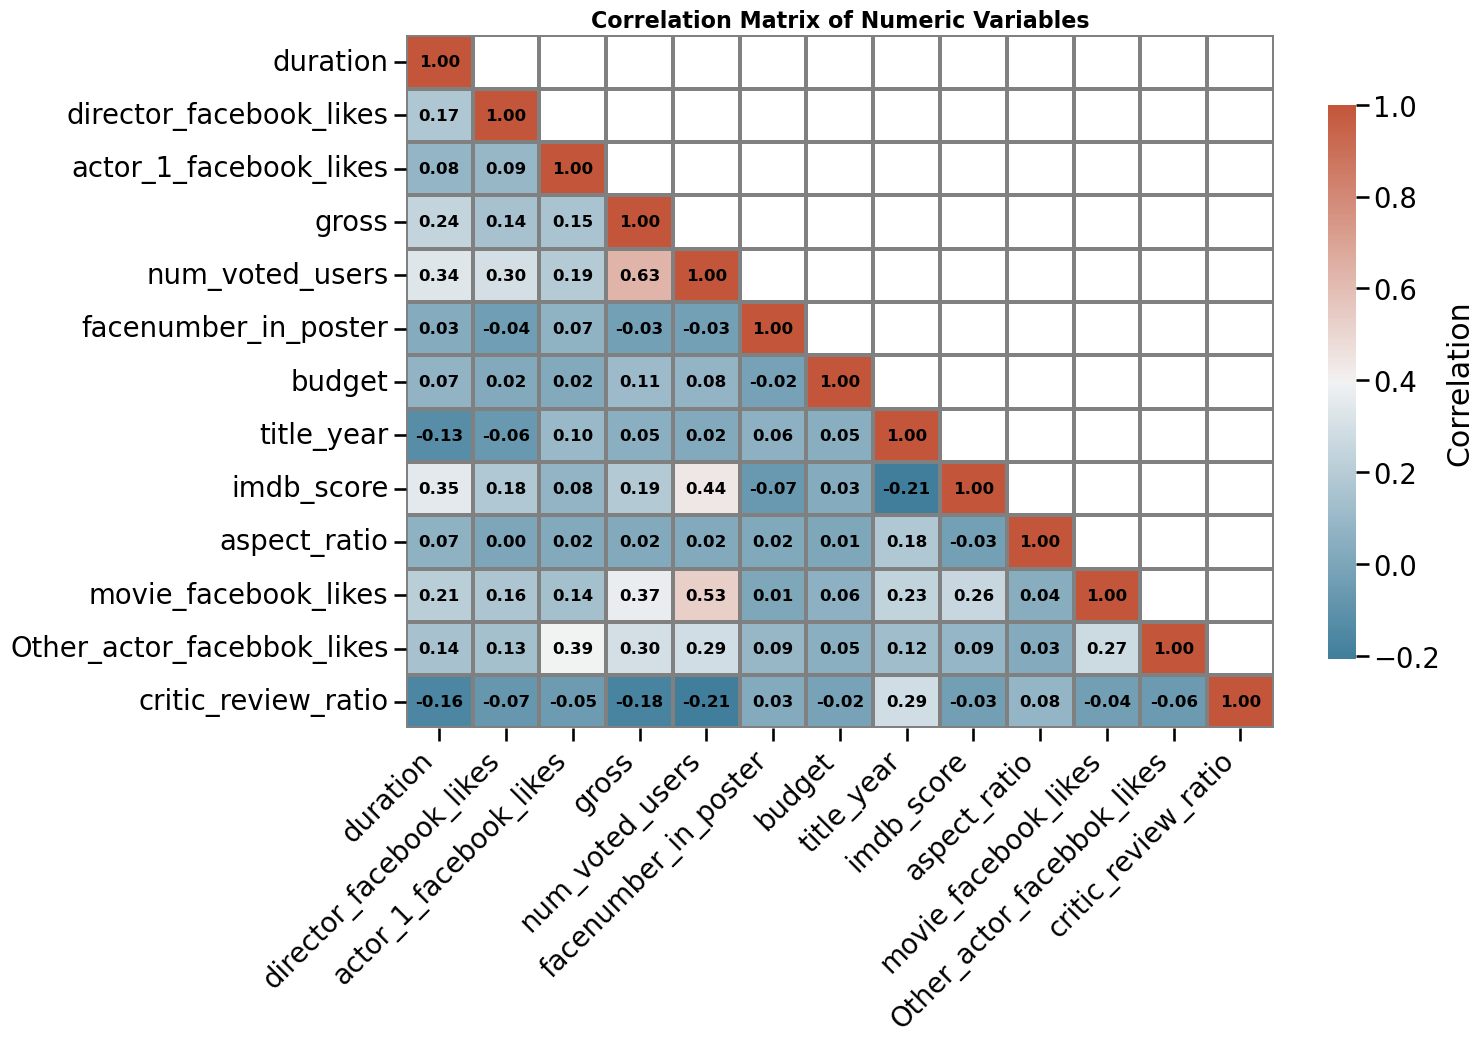

In [53]:

# New correlation matrix

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Set up the figure size and context
sns.set_context("talk", font_scale=1.2)  # Adjust context and font size
plt.figure(figsize=(14, 9))  # Adjust figure size

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# Set a custom color palette
custom_palette = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap with customizations
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap=custom_palette,
                annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},  # Annotation style
                cbar_kws={'shrink': 0.8, 'label': 'Correlation'},  # Color bar settings
                linewidths=1.5, linecolor='gray')  # Add lines between cells

# Rotate the x and y-axis labels for better readability
a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
a.set_yticklabels(a.get_yticklabels(), rotation=0)

# Add a title
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, weight='bold')

# Show the plot
plt.show()


**Categorizing IMDb Scores into Rating Tiers**

In [55]:

# Categorizing IMDb scores into bins 1: Bad (0–4), 2: Average (4–6), 3: Good (6–8), 4: Excellent (8–10)
df["imdb_binned_score"]=pd.cut(df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1


In [56]:

# Removing the original 'imdb_score' column as it has been replaced with 'imdb_binned_score'
df.drop('imdb_score',axis=1,inplace=True)


In [57]:

# Distribution of the "imdb_binned_score" column
df["imdb_binned_score"].value_counts()


imdb_binned_score
3    3014
2    1323
4     202
1     154
Name: count, dtype: int64

**Convert the categorical columns 'country' and 'content_rating' in the into numerical columns**

In [59]:

df = pd.get_dummies(data = df, columns = ['country'] , prefix = ['country'] , drop_first = True)
df = pd.get_dummies(data = df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)


In [60]:
df.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
       'title_year', 'aspect_ratio', 'movie_facebook_likes',
       'Other_actor_facebbok_likes', 'critic_review_ratio',
       'imdb_binned_score', 'country_USA', 'country_other', 'content_rating_G',
       'content_rating_GP', 'content_rating_M', 'content_rating_NC-17',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_Passed', 'content_rating_R', 'content_rating_TV-14',
       'content_rating_TV-G', 'content_rating_TV-PG', 'content_rating_Unrated',
       'content_rating_X'],
      dtype='object')

**Performing data preparation and train-test splitting**


In [62]:

X = pd.DataFrame(columns=['duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 
                          'facenumber_in_poster', 'budget', 'title_year', 'aspect_ratio', 'movie_facebook_likes', 
                          'Other_actor_facebbok_likes', 'critic_review_ratio', 'country_USA', 'country_other', 
                          'content_rating_G', 'content_rating_GP', 'content_rating_M', 'content_rating_NC-17', 
                          'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13', 
                          'content_rating_Passed', 'content_rating_R', 'content_rating_TV-14', 'content_rating_TV-G', 
                          'content_rating_TV-PG', 'content_rating_Unrated', 'content_rating_X'], data=df)

y = pd.DataFrame(columns=['imdb_binned_score'], data=df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


*Performing feature scaling on the training and testing data*

In [64]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


**Applying Machine Learning Algorithms**

**1. Logistic Regression**

In [67]:

logit =LogisticRegression()
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

# Confusion matrix for logistic regression
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


[[  0  35  14   0]
 [  1 173 229   1]
 [  1 117 774   6]
 [  0   2  26  29]]
Accuracy: 0.6931818181818182


**2. KNN**

In [69]:

# Set the maximum number of CPU cores to use
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace '4' with the number of cores you want to use.

# Apply KNN classifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, np.ravel(y_train, order='C'))
knnpred = knn.predict(X_test)

# Confusion matrix for KNN
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print("Confusion Matrix:\n", cnf_matrix)

# Calculate and display accuracy
accuracy = metrics.accuracy_score(y_test, knnpred)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[  0  30  19   0]
 [  0 173 231   0]
 [  0 146 752   0]
 [  0   1  47   9]]
Accuracy: 0.6633522727272727


**3. SVC**

In [71]:

svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
svcpred = svc.predict(X_test)

# Confusion matrix for SVC
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))


[[  1  35  13   0]
 [  1 188 215   0]
 [  1 184 687  26]
 [  0  12  21  24]]
Accuracy: 0.6392045454545454


**4. Decision Tree**

In [73]:

dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)

# Confusion matrix for Decision Tree
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))


[[ 14  22  13   0]
 [ 22 208 173   1]
 [ 17 210 643  28]
 [  0   0  21  36]]
Accuracy: 0.6399147727272727


**5. Random Forest**

In [75]:

rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)

# Confusion matrix for Random Forest
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))


[[  0  33  16   0]
 [  0 191 213   0]
 [  0  76 820   2]
 [  0   1  29  27]]
Accuracy: 0.7372159090909091


**6. Gradient Boosting**

In [77]:

gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train,np.ravel(y_train,order='C'))
test_pred = gbcl.predict(X_test)

# Confusion matrix for Gradient Boosting
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))


[[  2  34  13   0]
 [  9 227 168   0]
 [  6 102 772  18]
 [  1   0  25  31]]
Accuracy: 0.7329545454545454


**COMPARISON OF THE MODELS**

In [104]:

# Logistic Regression
logit_report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
logit_df = pd.DataFrame(logit_report).transpose()
print("Logistic Regression Report")
display(logit_df)

# KNN
knn_report = classification_report(y_test, knnpred, zero_division=0, output_dict=True)
knn_df = pd.DataFrame(knn_report).transpose()
print("KNN Report")
display(knn_df)

# SVC
svc_report = classification_report(y_test, svcpred, zero_division=0, output_dict=True)
svc_df = pd.DataFrame(svc_report).transpose()
print("SVC Report")
display(svc_df)

# Decision Tree
dtree_report = classification_report(y_test, dtreepred, zero_division=0, output_dict=True)
dtree_df = pd.DataFrame(dtree_report).transpose()
print("Decision Tree Report")
display(dtree_df)

# Random Forest
rfc_report = classification_report(y_test, rfcpred, zero_division=0, output_dict=True)
rfc_df = pd.DataFrame(rfc_report).transpose()
print("Random Forest Report")
display(rfc_df)

# Gradient Boosting
gbcl_report = classification_report(y_test, test_pred, zero_division=0, output_dict=True)
gbcl_df = pd.DataFrame(gbcl_report).transpose()
print("Gradient Boosting Report")
display(gbcl_df)


Logistic Regression Report


,precision,recall,f1-score,support
1,0.000000,0.000000,0.000000,49.000000
2,0.529052,0.428218,0.473324,404.000000
3,0.742090,0.861915,0.797527,898.000000
4,0.805556,0.508772,0.623656,57.000000
accuracy,0.693182,0.693182,0.693182,0.693182
macro avg,0.519174,0.449726,0.473627,1408.000000
weighted avg,0.657706,0.693182,0.669709,1408.000000


KNN Report


,precision,recall,f1-score,support
1,0.000000,0.000000,0.000000,49.000000
2,0.494286,0.428218,0.458886,404.000000
3,0.716873,0.837416,0.772470,898.000000
4,1.000000,0.157895,0.272727,57.000000
accuracy,0.663352,0.663352,0.663352,0.663352
macro avg,0.552790,0.355882,0.376021,1408.000000
weighted avg,0.639520,0.663352,0.635379,1408.000000


SVC Report


,precision,recall,f1-score,support
1,0.333333,0.020408,0.038462,49.000000
2,0.448687,0.465347,0.456865,404.000000
3,0.733974,0.765033,0.749182,898.000000
4,0.480000,0.421053,0.448598,57.000000
accuracy,0.639205,0.639205,0.639205,0.639205
macro avg,0.498999,0.417960,0.423277,1408.000000
weighted avg,0.627892,0.639205,0.628405,1408.000000


Decision Tree Report


,precision,recall,f1-score,support
1,0.264151,0.285714,0.274510,49.000000
2,0.472727,0.514851,0.492891,404.000000
3,0.756471,0.716036,0.735698,898.000000
4,0.553846,0.631579,0.590164,57.000000
accuracy,0.639915,0.639915,0.639915,0.639915
macro avg,0.511799,0.537045,0.523316,1408.000000
weighted avg,0.649719,0.639915,0.644087,1408.000000


Random Forest Report


,precision,recall,f1-score,support
1,0.000000,0.000000,0.000000,49.000000
2,0.634551,0.472772,0.541844,404.000000
3,0.760668,0.913140,0.829960,898.000000
4,0.931034,0.473684,0.627907,57.000000
accuracy,0.737216,0.737216,0.737216,0.737216
macro avg,0.581563,0.464899,0.499928,1408.000000
weighted avg,0.704906,0.737216,0.710227,1408.000000


Gradient Boosting Report


,precision,recall,f1-score,support
1,0.111111,0.040816,0.059701,49.000000
2,0.625344,0.561881,0.591917,404.000000
3,0.789366,0.859688,0.823028,898.000000
4,0.632653,0.543860,0.584906,57.000000
accuracy,0.732955,0.732955,0.732955,0.732955
macro avg,0.539619,0.501561,0.514888,1408.000000
weighted avg,0.712355,0.732955,0.720510,1408.000000


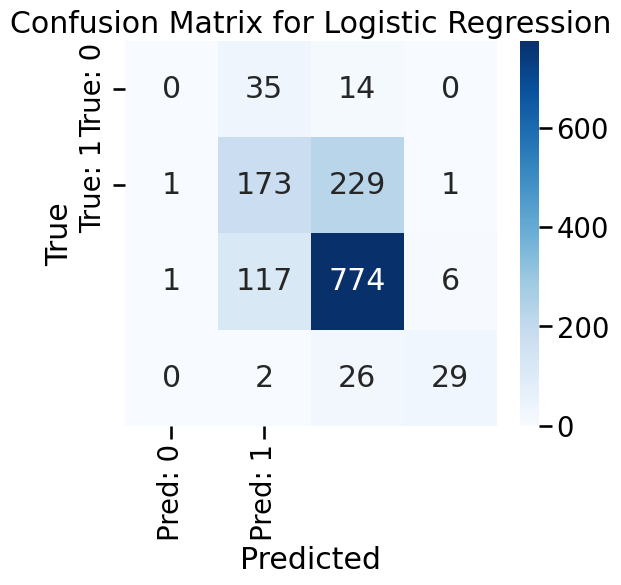

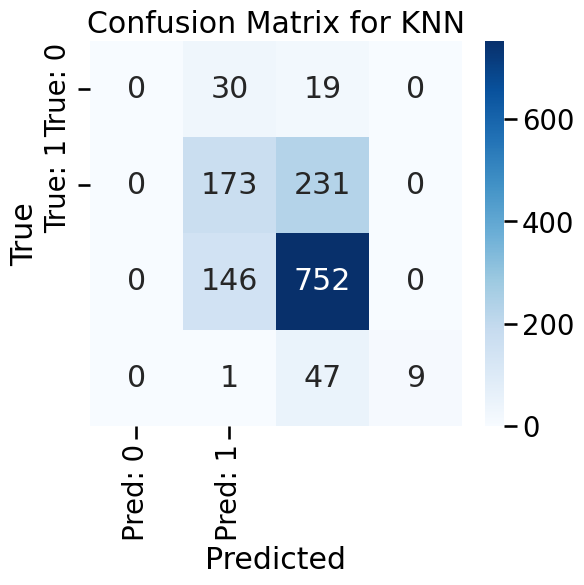

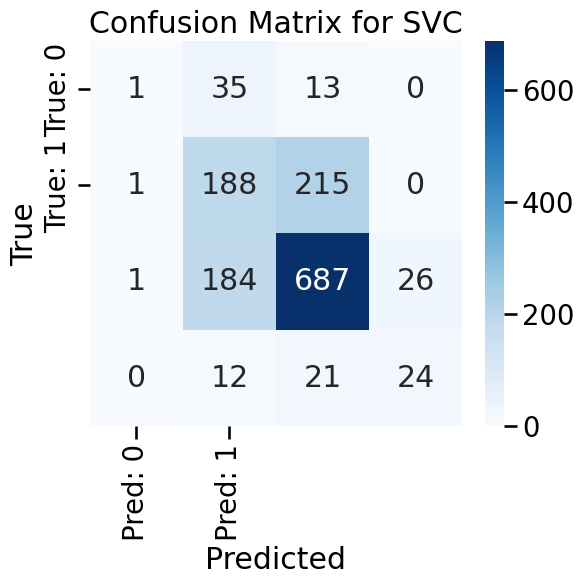

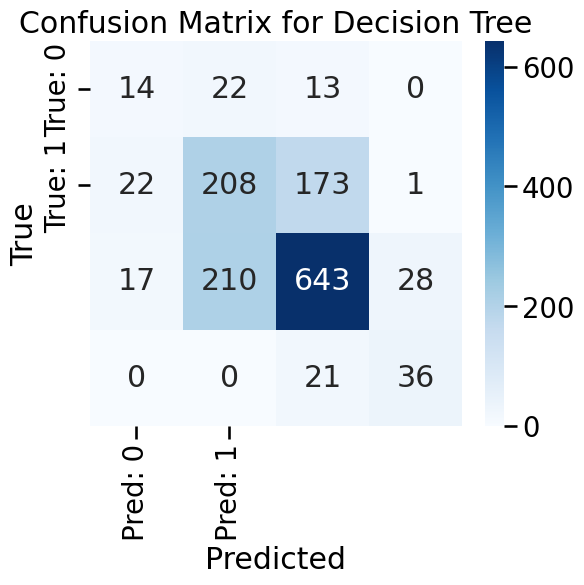

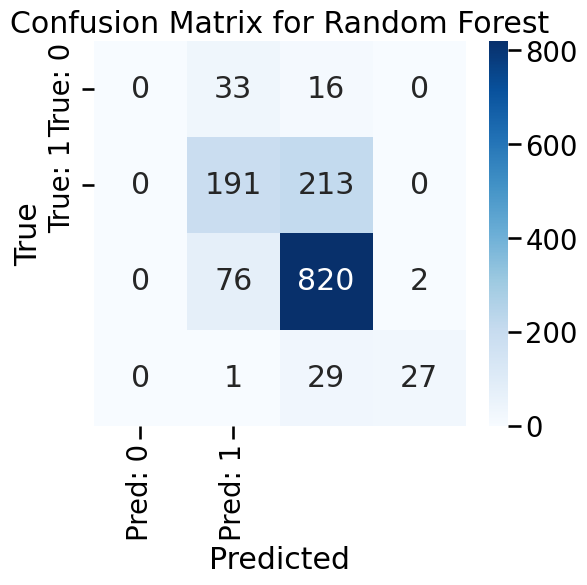

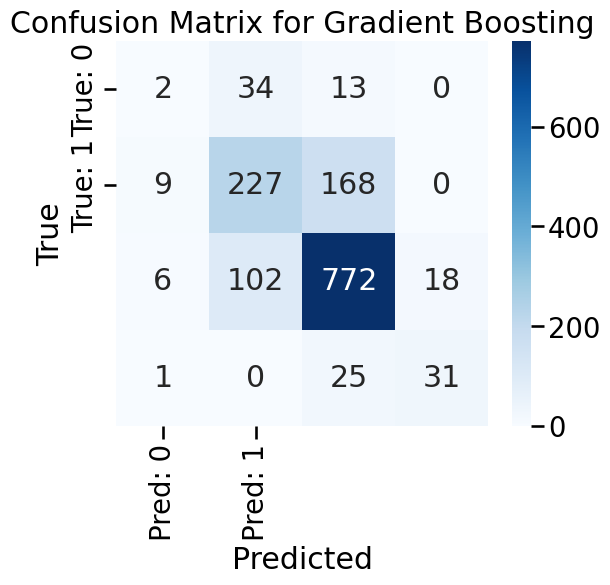

In [109]:

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test, y_pred, 'Logistic Regression')

# KNN
plot_confusion_matrix(y_test, knnpred, 'KNN')

# SVC
plot_confusion_matrix(y_test, svcpred, 'SVC')

# Decision Tree
plot_confusion_matrix(y_test, dtreepred, 'Decision Tree')

# Random Forest
plot_confusion_matrix(y_test, rfcpred, 'Random Forest')

# Gradient Boosting
plot_confusion_matrix(y_test, test_pred, 'Gradient Boosting')


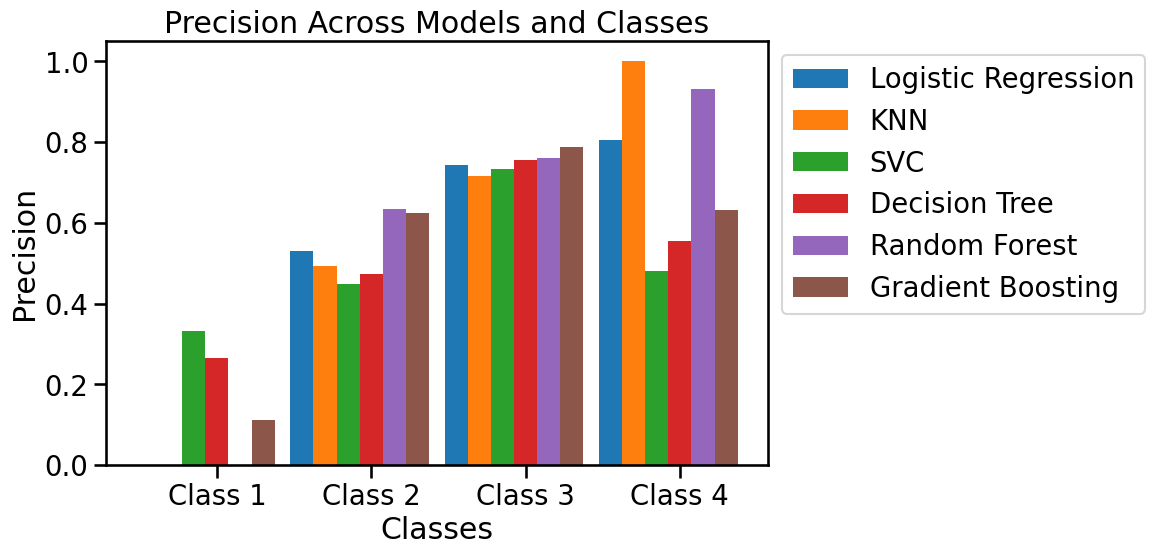

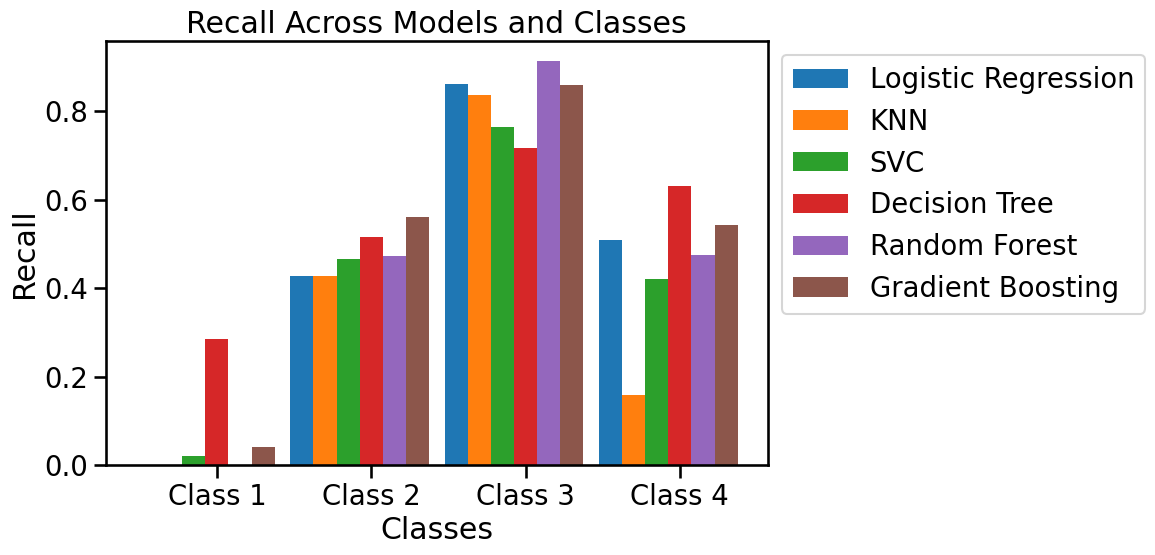

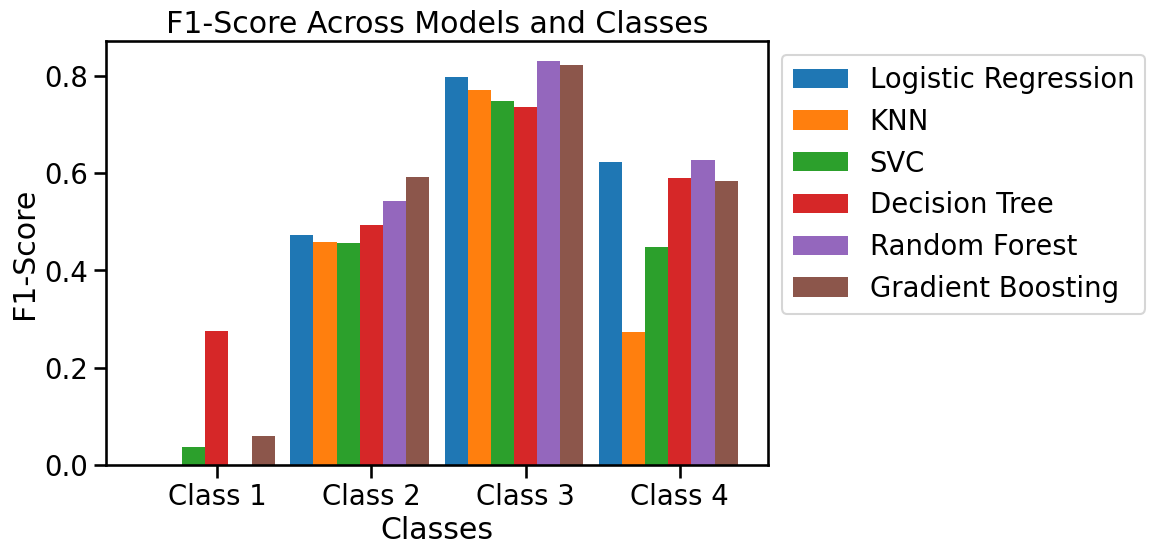

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Define classification report data for each model (precision, recall, F1-score for each class)
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Precision values
precision_values = [
    [0.0, 0.529, 0.742, 0.806],  # Logistic Regression
    [0.0, 0.494, 0.717, 1.000],  # KNN
    [0.333, 0.449, 0.734, 0.480],  # SVC
    [0.264, 0.473, 0.756, 0.554],  # Decision Tree
    [0.0, 0.635, 0.761, 0.931],  # Random Forest
    [0.111, 0.625, 0.789, 0.633]  # Gradient Boosting
]

# Recall values
recall_values = [
    [0.0, 0.428, 0.862, 0.509],  # Logistic Regression
    [0.0, 0.428, 0.837, 0.158],  # KNN
    [0.020, 0.465, 0.765, 0.421],  # SVC
    [0.286, 0.515, 0.716, 0.632],  # Decision Tree
    [0.0, 0.473, 0.913, 0.474],  # Random Forest
    [0.041, 0.562, 0.860, 0.544]  # Gradient Boosting
]

# F1-Score values
f1_values = [
    [0.0, 0.473, 0.798, 0.624],  # Logistic Regression
    [0.0, 0.459, 0.772, 0.273],  # KNN
    [0.038, 0.457, 0.749, 0.449],  # SVC
    [0.275, 0.493, 0.736, 0.590],  # Decision Tree
    [0.0, 0.542, 0.830, 0.628],  # Random Forest
    [0.060, 0.592, 0.823, 0.585]  # Gradient Boosting
]

# Classes for each metric
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

# Function to plot metrics
def plot_metric(metric_values, metric_name):
    bar_width = 0.15
    x_indices = np.arange(len(classes))
    plt.figure(figsize=(12, 6))
    
    for i, model in enumerate(models):
        plt.bar(x_indices + i * bar_width, metric_values[i], width=bar_width, label=model)
    
    plt.title(f'{metric_name} Across Models and Classes')
    plt.xlabel('Classes')
    plt.ylabel(metric_name)
    plt.xticks(x_indices + bar_width * (len(models) // 2), classes)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Plot metrics
plot_metric(precision_values, 'Precision')
plot_metric(recall_values, 'Recall')
plot_metric(f1_values, 'F1-Score')
